<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h3 style="text-align: center;"><b>Семинар. Введение в анализ данных. Библиотеки Pandas, Matplotlib </b></h3>


<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

В этом семинаре вы научитесь проводить первичный анализ и визуализацию данных при помощи библиотек Pandas и Matplotlib. Мы будем работать с датасетом [Titanic](https://www.kaggle.com/competitions/titanic/overview).

**План семинара:**
* Работа с данными
  * Загрузка данных Titanic
  * Описание данных
  * Знакомство с данными и введение в pandas

* Анализ данных
  * Введение в matplotlib (+ бонус seaborn)
  * Очистка данных
  * Создание новых признаков (Feature Engineering)
  * Удаление данных
  * Шаг 1. Анализ целевой переменной
  * Шаг 2. Анализ признаков, по которым строится прогноз модели
    * Количественные признаки
      * Корреляция данных
    * Категориальные признаки
      * One-hot encoding
      * Label encoding
  * Шаг 3. Анализ влияния признаков на целевую переменную

* Подготовка данных
  * Разделение на train/test
  * Масштабирование признаков
  



Начнем!

## Данные

### Описание и загрузка данных

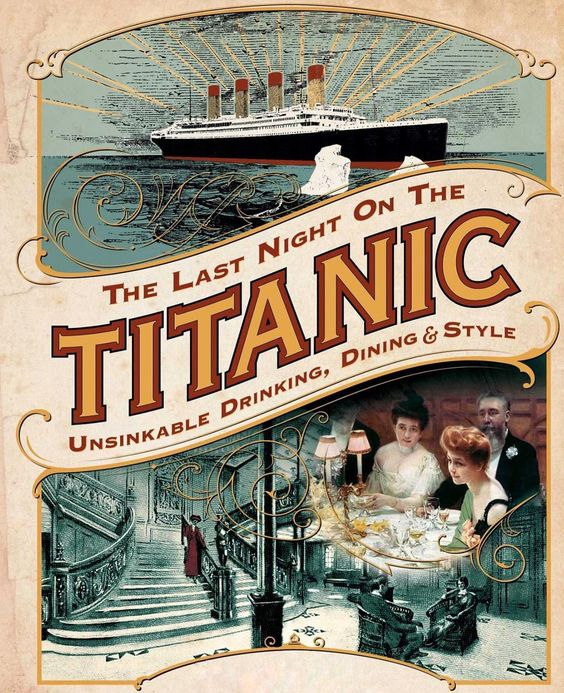

На датасете Titanic ставится задача бинарной классификации — по информации о пассажире предсказать, выживет пассажир или нет. Признаки в датасете следующие:

- **PassengerId** - id пассажира
- **Pclass** - класс обслуживания билета (1 = первый, 2 = второй, 3 = третий)
- **Name** - имя пассажира
- **Sex** - пол пассажира
- **Age** - возраст пассажира
- **SibSp** - семейные отношения sibling/spouse (sibling = брат, сестра, сводный брат, сводная сестра, spouse = муж, жена)
- **Parch** - семейные отношения parent/child (parent = родитель
child = ребенок). Некоторые дети путешествовали только с няней, поэтому для них parch=0.
- **Ticket** - номер билета
- **Fare** - стоимость билета
- **Cabin** - номер кабины
- **Embarked** - Порт посадки. (C = Шербур, Q = Квинстаун, S = Саутгемптон)

Целевая переменная:
- <font color='blue'>**Survived**</font> - Выжил человек или нет. 0 = Нет, 1 = Да.

Скачаем данные:

In [ ]:
!gdown 1KWlcYkMkDIZdATT2TTcnIfudNP-PSUci

Downloading...
From: https://drive.google.com/uc?id=1KWlcYkMkDIZdATT2TTcnIfudNP-PSUci
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 12.1MB/s]


Иногда, когда данные много весят, имеет смысл сохранить их на свой гугл диск и подгружать в ноутбук оттуда.

Студенты с прошлых потоков сделали замечательную [инструкцию](https://disk.yandex.ru/i/sqqI2xVBcztIDw) по использованию Google Colab, где вы можно узнать, как можно загрузить данные на Google Disk.


Прежде чем работать с датасетом Титаник, давайте познакомимся с библиотекой Pandas. Это библиотека для удобной работы с данными, представленными в виде таблиц.

### Знакомство с данными и введение в pandas

**Pandas** - это библиотека Python для удобной работы с данными, представленными в виде таблиц.

В ней есть удобные функции для анализа, очистки, изучения и предобработки данных.

Рекомендуемые материалы по Pandas:
* Очень классный плейлист на ютубе [What is a Pandas?](https://youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&si=6faVt2CiaaA73QAQ).

В Google Colab библиотека Pandas установлена по умолчанию, но в случае чего установить ее можно так:

In [ ]:
!pip install pandas

Импортируем библиотеку. Pandas обычно импортируется как `pd`:



In [ ]:
import pandas as pd

#### Pandas Series

Одной из основных структур данных в библиотеке Pandas является Pandas Series. Элемент Pandas Series похож на столбец в таблице: это одномерный массив, содержащий данные любого типа.

Элементы Pandas Series помечаются номерами индексов. Первое значение имеет индекс 0, второе - индекс 1 и т. д.

Заведем столбец Series из обычного питоновского массива:

In [ ]:
a = [1, 7, 2]

series = pd.Series(a)

series

,0
0,1
1,7
2,2


В Series массивах доступ к элементам по индексу осуществляется с помощью .iloc:

In [ ]:
series.loc[0]

1

In [ ]:
series.iloc[0]

1

Также можно изменить столбец индексов на кастомный. Делается это так:

In [ ]:
series = pd.Series(a, index = ["x", "y", "z"])

series

,0
x,1
y,7
z,2


In [ ]:
series.loc['x']

1

In [ ]:
series.iloc[2]

2

#### Pandas DataFrame

Столбец — это хорошо, но мы чаще работаем с целыми таблицами данных (наборами столбцов). Тип данных, соответствующий таблице — DataFrame.

Pandas DataFrame - это двумерная структура данных, подобная двумерному массиву или таблице со строками и столбцами. Иными словами, Pandas Series - это один столбец таблицы, а DataFrame - это вся таблица.

In [ ]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# можно создать таблицу из Python Dict
# keys словаря будут названиями столбцов
df = pd.DataFrame(data)
df

,calories,duration
0,420,50
1,380,40
2,390,45


Доступ к отдельному столбцу таблицы можно получить по названию этого столбца:

In [ ]:
df['calories']

,calories
0,420
1,380
2,390


In [ ]:
df['duration']

,duration
0,50
1,40
2,45


Доступ к строке таблицы также осуществляется с помощью .iloc:

In [ ]:
df.iloc[1]

,1
calories,380
duration,40


In [ ]:
df.loc[1]

,1
calories,380
duration,40


#### Создание таблицы Pandas DataFrame из файла

Чаще всего в машинном обучении мы работаем с данными, сохраненными в файлах формата [.csv (comma separated values)](https://blog.skillfactory.ru/glossary/csv-format/#:~:text=CSV%20(Comma%2DSeparated%20Values)

Выше мы скачали датасет Титаник. Самое время загрузить его с помощью Pandas DataFrame. Это делается следующим образом:

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# index_col задает название колонки в файле, которая будет считаться колонкой индексов
df = pd.read_csv("/content/titanic.csv", index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Исследование данных

Метод `.head()` позволяет вывести первые несколько строк таблицы в красивом формате.

In [ ]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Чтобы вывести рандомные строки в таблице, воспользуемся методом `.sample()`

In [ ]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q


Также есть метод `.tail()` для просмотра нескольких последних строк DataFrame.

In [ ]:
df.tail(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Воспользуемся методом `loc`, чтобы посмотреть на одну или несколько строк наших данных:

In [ ]:
df.loc[889] # к конкретной строке

,889
Survived,0
Pclass,3
Name,"Johnston, Miss. Catherine Helen ""Carrie"""
Sex,female
Age,NaN
SibSp,1
Parch,2
Ticket,W./C. 6607
Fare,23.45
Cabin,NaN


In [ ]:
df.loc[3]

,3
Survived,1
Pclass,3
Name,"Heikkinen, Miss. Laina"
Sex,female
Age,26.0
SibSp,0
Parch,0
Ticket,STON/O2. 3101282
Fare,7.925
Cabin,NaN


In [ ]:
df.loc[7:14]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


In [ ]:
df.iloc[7:14]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


In [ ]:
df.loc[[1,7,12]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
df.iloc[[1,7,12]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


Далее, вывести список колонок в нашей таблице можно с помощью метода .columns:

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Как мы видели выше, доступ к конкретной колонке можно получить по ее названию:

In [ ]:
df['Name']

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
...,...
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""


In [ ]:
df['Survived']

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


Теперь: с помощью метода `.loc()` можно обратиться к конкретным элементам данных на основе индексов их строк и столбцов:

In [ ]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.loc[2, 'Pclass']

1

In [ ]:
# элемент на пересечении 1 строки и столбца Survived
df.loc[1, 'Survived']

0

In [ ]:
# элементы колонки Survived с индексами строк от 2 до 5
df.loc[2:5,'Survived']

,Survived
PassengerId,
2,1
3,1
4,1
5,0


In [ ]:
# элементы колонок Survived и Sex с индексом строк от 0 до 5
df.loc[:5,['Survived', 'Age']]

,Survived,Age
PassengerId,,
1,0,22.0
2,1,38.0
3,1,26.0
4,1,35.0
5,0,35.0


In [ ]:
# элементы колонок Survived и Sex с индексом строк от 0 до 5
df.loc[2:5,'Survived':'Age']

,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0


Также в Pandas таблице можно отфильтровать элементы на основе условий. Например, так мы можем вывести строки, в которых значение колонки Sex равно 'male':

In [ ]:
df.loc[(df.Sex == 'male')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


Также можно соединять несколько условий. Например, давайте выведем строки таблицы, для которых значение столбца Sex равно 'male', а Survived равно 0 (т.е. мы выводим людей мужского пола, не выживших на Титанике):

In [ ]:
df.loc[(df.Sex == 'male') & (df.Survived == 0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


& соответствует "и", | соответствует "или". Так можно вывести всех людей из датасета, которые либо мужчины, либо не выжили на Титанике:

In [ ]:
df.loc[(df.Sex == 'male') | (df.Survived == 0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Также, получая доступ к элементу с помощью `.loc()`, можно обновить значение этого элемента в таблице. Давайте, например, поменяем значения 0 в колонке Survived на -1.

Вот как сейчас выглядят наши данные:

In [ ]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Поменяем значения 0 колонки Survived на -1:

In [ ]:
df.loc[(df.Survived == 0), ['Survived']] = -1

Вот что получится:

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,-1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,-1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


И вернем обратно все как было:

In [ ]:
df.loc[(df.Survived == -1), ['Survived']] = 0.0

Далее, у объекта DataFrame есть удобные методы для получения общей информации о данных.

Метод `.info()` сообщает нам, сколько в наших данных строк и столбцов, и для каждого столбца дает его название, тип данных в нем и количество непустых значений в нем:

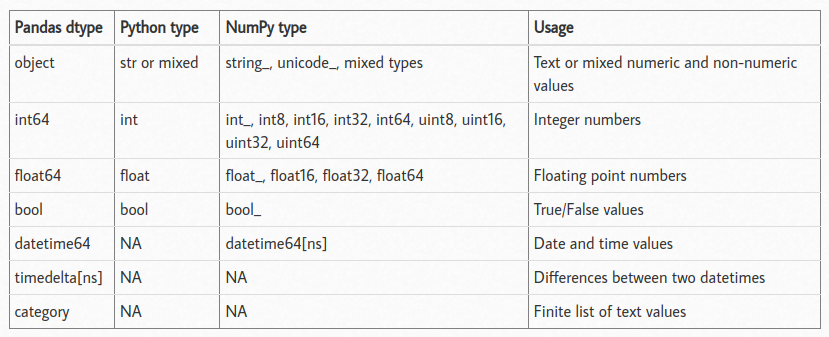

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


Как видим, в нашем наборе данных в столбце Survived только 891 из 1309 не пропущены. Это означает, что в 418 строках столбца Survived по какой-то причине вообще нет значений.

Пропущенные значения составляют проблему при анализе данных и обучении моделей. С такими значениями обычно нужно что-то делать. Об этом мы поговорим позже в теме очистки и предобработки данных.

Еще один метод описания данных — `.describe()`. Он выводит основные статистики числовых столбцов данных:

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Итак, мы научились считывать наши данные с файла и смотреть на них. Давайте теперь попробуем проанализировать их.

## Анализ данных

### Библиотека Matplotlib

Сейчас мы познакомимся с **Matplotlib** — удобной библиотекой, которая поможет нам визуализировать наши данные и сделает их анализ более приятным.

Материалы для ознакомления:
* Для базового ознакомления можно почитать [Matplotlib Quick Start](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).
* Данный семинар вдохновлялся данной лекцией про визаульный анализ данных $→$ [тык на ссылку](https://www.youtube.com/watch?v=uJpDzHGUamg&ab_channel=machinelearrrning).

Устанавливается библиотека так (как и Pandas, в Google Colab она установлена по умолчанию):

In [ ]:
!pip install matplotlib

Испортируется Matplotlib следующим образом:

In [ ]:
import matplotlib.pyplot as plt

Давайте еще импортируем библиотеку Numpy, она нам понадобится в процессе:

In [ ]:
import numpy as np

Теперь давайте научимся строить простой линейный график с помощью Matplotlib.

x = [0 1 2 3 4 5 6 7 8 9]
y = [8 9 4 6 4 7 2 3 9 3]


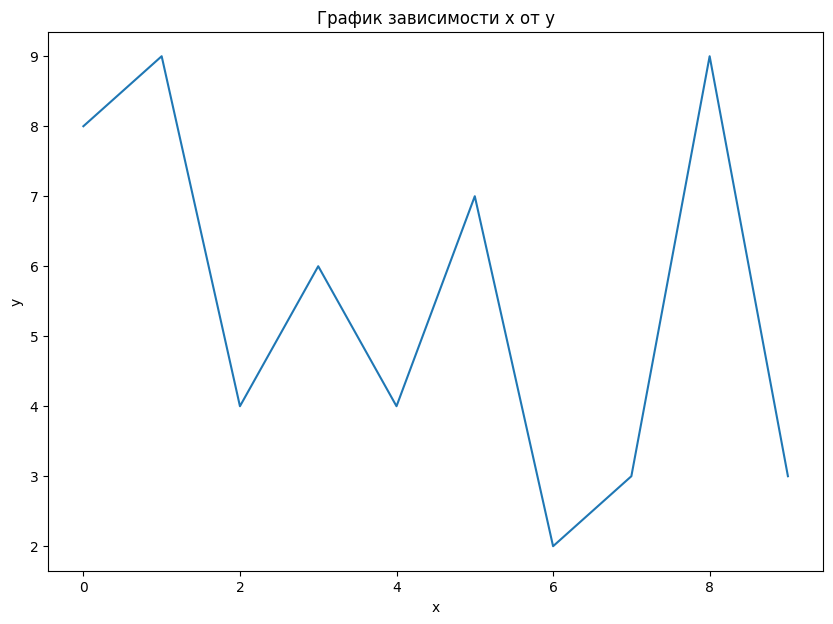

In [ ]:
# Зададим значения x и y
x = np.arange(10)
y = np.random.randint(1, 10, size=10)

print(f'x = {x}')
print(f'y = {y}')

# Задаем размер полотна, на котором будет отрисован график
plt.figure(figsize=(10,7))
# Построим линейную диаграмму
plt.plot(x, y)

# Добавим заголовок
plt.title("График зависимости x от у")

# Добавим подпись к осям
plt.xlabel("x")
plt.ylabel("y")

# Отрисовываем результат
plt.show()

Также можно отрисовывать точки, не соединенные линиями. Это называется Scatter Plot:

x = [0 1 2 3 4 5 6 7 8 9]
y = [5 5 2 6 7 2 8 8 4 8]


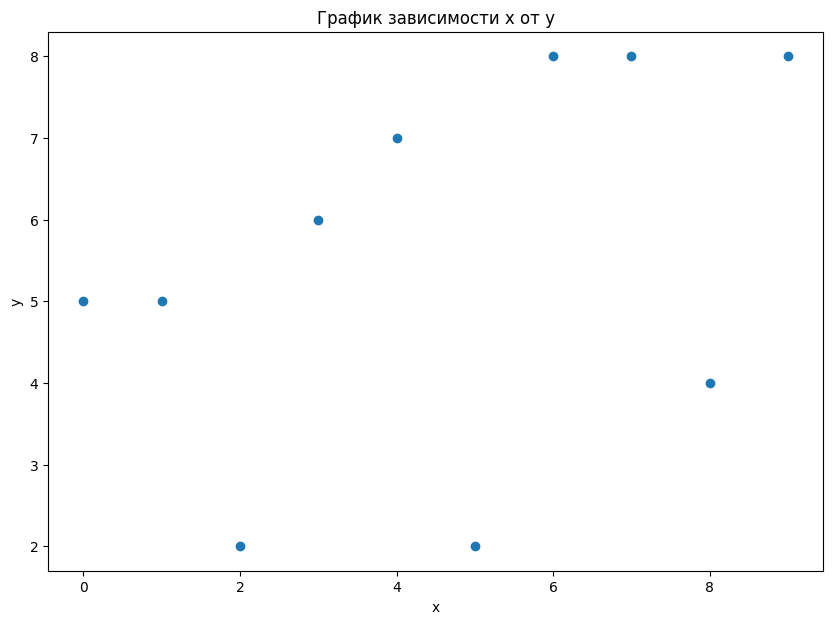

In [ ]:
# Зададим значения x и y
x = np.arange(10)
y = np.random.randint(1, 10, size=10)

print(f'x = {x}')
print(f'y = {y}')

# Задаем размер полотна, на котором будет отрисован график
plt.figure(figsize=(10,7))
# Строим Scatter Plot
plt.scatter(x, y)

# Добавим заголовок
plt.title("График зависимости x от у")

# Добавим подпись к осям
plt.xlabel("x")
plt.ylabel("y")

# Отрисовываем результат
plt.show()

Давайте сделаем наш график немного красивее: отрисуем две линии разных цветов и подпишем оси. Классный сайт для подбора цветов: [In Color Balance](https://color.romanuke.com/)

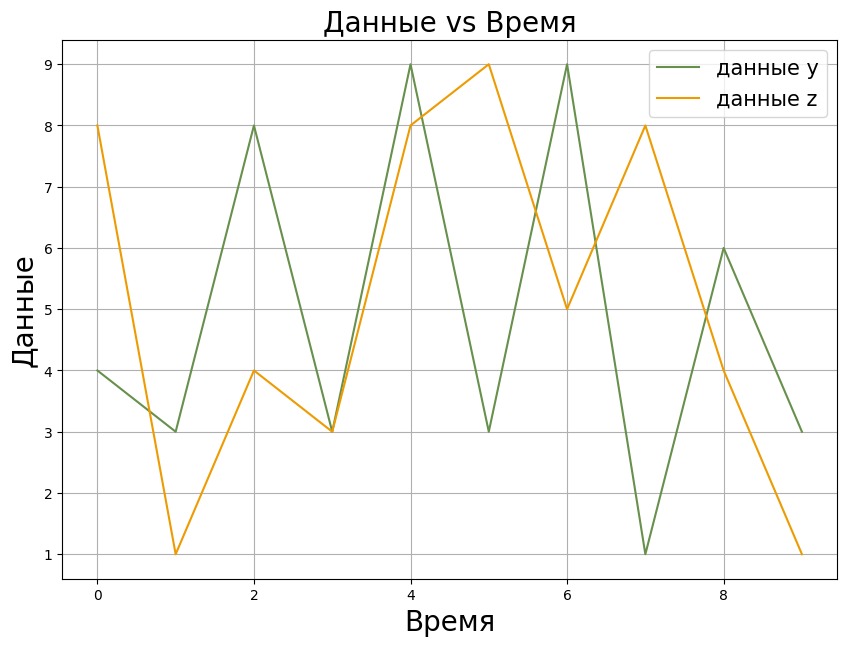

In [ ]:
# Хочу чтоб было красиво...

x = np.arange(10)
y = np.random.randint(1,10,size=10)
z = np.random.randint(1,10,size=10)

# задаем размер диаграммы
plt.figure(figsize=(10,7))

# рисуем линейный график
plt.plot(x,y, color="#68904D", label='данные y')
plt.plot(x,z, color="#EE9B01", label='данные z')

# add title
plt.legend(fontsize=15)
plt.title("Данные vs Время", fontsize=20)
# подписываем оси
plt.xlabel("Время",fontsize=20)
plt.ylabel("Данные",fontsize=20)

# так можно ограничить координаты осей OX и OY
# plt.xlim([-5, 20])
# plt.ylim([-5,20])

# отрисовываем сетку
plt.grid()

# Отрисовываем результат
plt.show()


Отлично, с основным синтаксисом Matplotlib для рисования графиков мы познакомились. Давайте теперь продолжим исследовать наши данные.

In [ ]:
plt.style.use('fivethirtyeight')

### Предобработка (очистка) данных

Очистка данных - это удаление или замена плохих данных в датасете.

Плохими данными могут быть:
* Пустые ячейки
* Данные в неправильном формате
* Неправильные данные
* Дубликаты

Выше мы уже обнаружили NaN значения в датасете в колонке Survived. Давайте поймем, где вообще в наших данных есть пропущенные значения.

In [ ]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Мы можем вывести для каждого элемента данных, пропущен он или нет, с помощью метода .isna():

In [ ]:
df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


Cуммируем по оси 0, чтобы узнать количество пропущенных значений в каждом из столбцов:

In [ ]:
df.isna().sum(axis=0)

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


А если суммировать по оси 1, получим количества пропущенных значений для каждой из строк:

In [ ]:
df.isna().sum(axis=1) # так и по оси 1

,0
PassengerId,
1,1
2,0
3,1
4,0
5,1
...,...
887,1
888,0
889,2


Также для красоты и удобства можно визуализировать количество пропущенных значений следующим способом:

<BarContainer object of 11 artists>

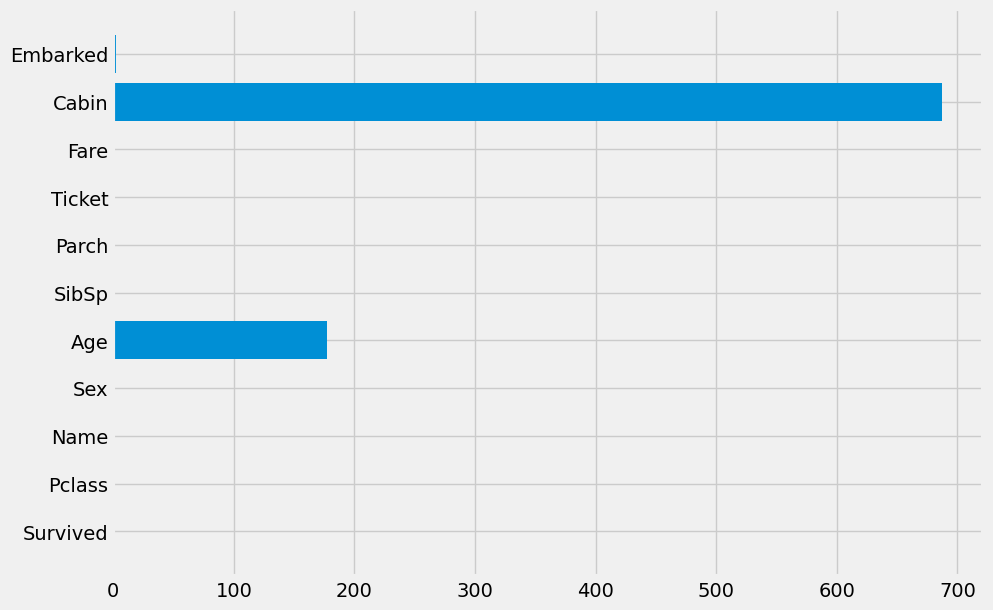

In [ ]:
data = df.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)

Давайте рассмотрим еще один способ визуализации — тепловую карту (heatmap). Ее мы построим при помощи библиотеки seaborn.


Для начала, поймем, что такое тепловая карта. Давайте рассмотрим простой массив:

In [ ]:
import seaborn as sns

In [ ]:
array = np.random.randint(1,100,size=(4,4))
array

array([[87, 72, 24, 66],
       [67,  4,  9, 15],
       [67, 51,  4, 48],
       [86, 92, 26, 46]])

Построим для него тепловую карту. Эта карта для каждого элемента данных цветом показывает величину этого элемента: элементы с большими абсолютными значениями выделены более яркими, белыми цветами, элементы с меньшими значениями выделены более темными цветами. Такая карта позволяет визуально оценить распределение и относительную величину элементов таблицы.

<Axes: >

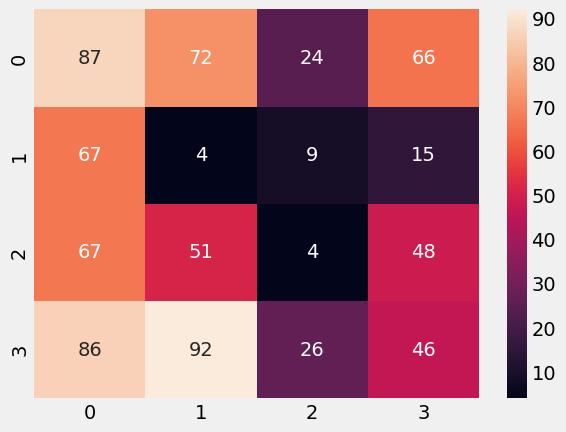

In [ ]:
sns.heatmap(array, annot = True)

Построим тепловую карту для наших пропущенных данных:

<Axes: xlabel='PassengerId'>

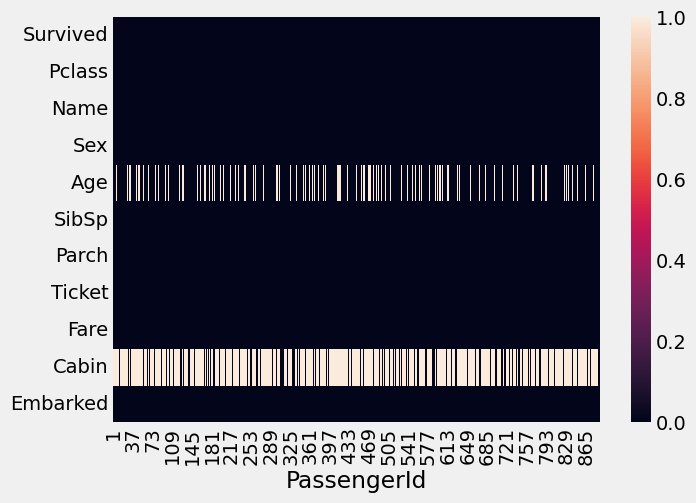

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isna().transpose())

In [ ]:
na_percentage = round((df['Cabin'].isna().sum() / len(df['Cabin'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признакак Cabin')

77.104 % пропущенных данных у признакак Cabin


Мы видим, что у признаков Age и Embarked есть пропуски. Нам нужно решить, что с ними делать. Например, можно удалить строки с пропущенными значениями. Или мы можем заполнить их какими-нибудь значениями. Чаще всего для этого используются статистики элементов в столбце, в котором мы заполняем пропуски: например, среднее, медиана или мода:

- **Мода** - значение изменяемого признака, которое встречается максимально часто.

- **Медиана** - значение признака, которое делит упорядоченное множество данных пополам.

- **Среднее** - среднее арифметическое, т.е. сумма всех значений признака, деленная на количество значений признака.

Если распределение симметрично, унимодально (имеет только одну моду) и не имеет заметных выбросов, то все три меры примерно дадут одинаковое значение. Если же ассиметрично или имеет заметные выбросы, лучше ориентироваться на моду или медиану.

Для числовых признаков часто используется медиана, для категориальных — мода.

Возьмем категориальный признак Embarked и выведем, сколько раз в этом столбце встречаются разные значения:

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


На эту же информацию можно посмотреть в другом виде:

<BarContainer object of 3 artists>

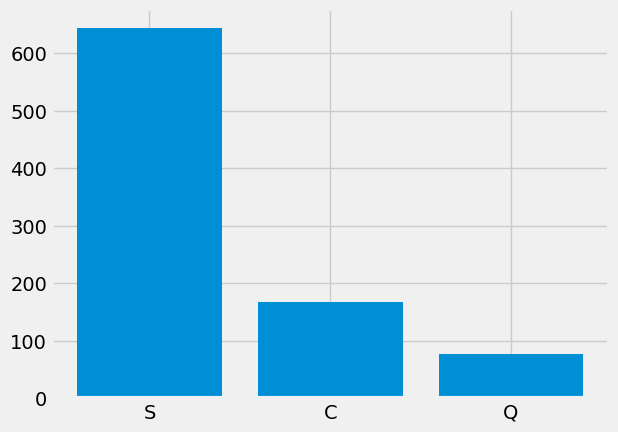

In [ ]:
# Нарисуем столбчатую диаграмму Embarked признака
data = df['Embarked'].value_counts()

plt.bar(data.index, data.values)

Самое часто встречающееся значение (оно же мода этого признака) — S:

In [ ]:
df['Embarked'].mode()

,Embarked
0,S


Теперь возьмем числовую колонку с пропущенными значениями Age и выведем ее медиану и среднее значение:

In [ ]:
mean_Age = np.mean(df['Age'].dropna().values)
median_Age = np.quantile(df['Age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = 29.69911764705882
Медиана = 28.0


Нарисуем распределение признака Age с его средним и медианой:

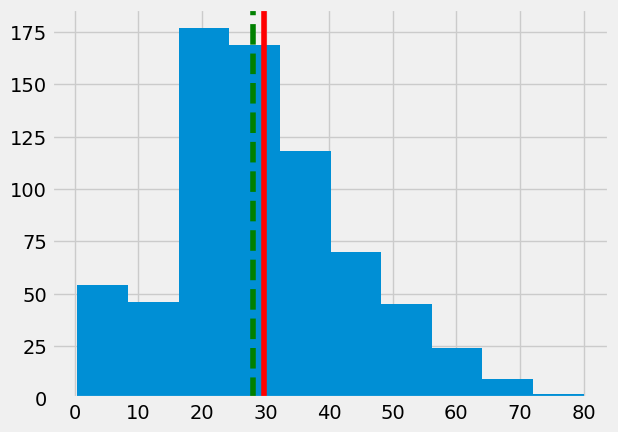

In [ ]:
plt.hist(df['Age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

Мы только что рассмотрели несколько способов визуализации информации о колонках датасета. Эту информацию можно использовать для заполнения пропсуков в данных. Но сейчас давайте просто удалим все строки с пропущенными значениями из нашего датасета.

In [ ]:
# Удаляем все NaN
df.dropna(inplace=True)

Проверяем, что пропущенных значений не осталось:

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


###  Создание новых признаков

Рекомендуемые материалы:
- Курс по [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) от Kaggle

Давайте посмотрим на столбец Name наших данных:

In [ ]:
df['Name']

,Name
PassengerId,
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
7,"McCarthy, Mr. Timothy J"
11,"Sandstrom, Miss. Marguerite Rut"
12,"Bonnell, Miss. Elizabeth"
...,...
872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"
873,"Carlsson, Mr. Frans Olof"
880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"


Name — колонка с именами пассажиров Титаника. Кажется, что эта колонка не очень информативна для определения того, выжил пассажир или нет. Вряд ли пассажиров спасательных шлюпок отбирали по их именам. Единственное, что может быть информативным в этом признаке — это Title (Miss/Mr/Ms) пассажира. Поэтому прежде чем удалить эту колонку из данных, давайте проверим корреляцию между этим признаком и целевой переменной (колонкой Survived).

В ячейке ниже мы извлекаем признак Title с помощью регулярных выражений. Шаблон RegEx (\w+\.) ищет первое слово, заканчивающееся точкой, в признаке Name. Флаг expand=False возвращает DataFrame.

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,1
Countess,1,0
Dr,1,2
Lady,1,0
Major,0,2
Master,0,7
Miss,44,0
Mlle,2,0


Мы видим, что есть некоторые титулы, которые встречаются нечасто. Давайте редкие титулы заменим на один класс, назовем его "Rare":

In [ ]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,1.000000
1,Miss,0.934783
2,Mr,0.370370
3,Mrs,0.923077
4,Rare,0.700000


Зачем нужно создание новых признаков? Вот несколько причин:

1. Иногда создание новых признаков помогает улучшить обучение модели. Это может происходить, если признаки очень похожи друг на друга. Тогда их объединение может дать большую пользу, чем признаки по отдельности. Например, если несколько признаков в данных сильно скоррелированы, то это вредит обучению линейных моделей. И если эти признаки объединить в один, результат может улучшиться.
2. Объединение признаков в какой то один признак позволяет уменьшить вычислительную сложность, так как модели нужно смотреть не на несколько признаков, а только на один, который будет вбирать в себя все важное.
3. Это помогает в некоторых случаях понятнее интерпретировать результаты.

### Удаление ненужных столбцов

Удалим ненужные признаки, такие как имя пассажира и номер билета (Name и Ticket), которые не несут существенной информации для предсказания. Также удалим признак Cabin, который почти полностью состоит из пропущенных данных.

In [ ]:
# Удалим ненужные признаки

df.drop(columns=["Cabin", 'Name', 'Ticket'], inplace=True)

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,Mrs
4,1,1,female,35.0,1,0,53.1000,S,Mrs
7,0,1,male,54.0,0,0,51.8625,S,Mr


### Шаг 1. Анализ целевой переменной

Давайте посмотрим на распределение значений целевой переменной Survived:

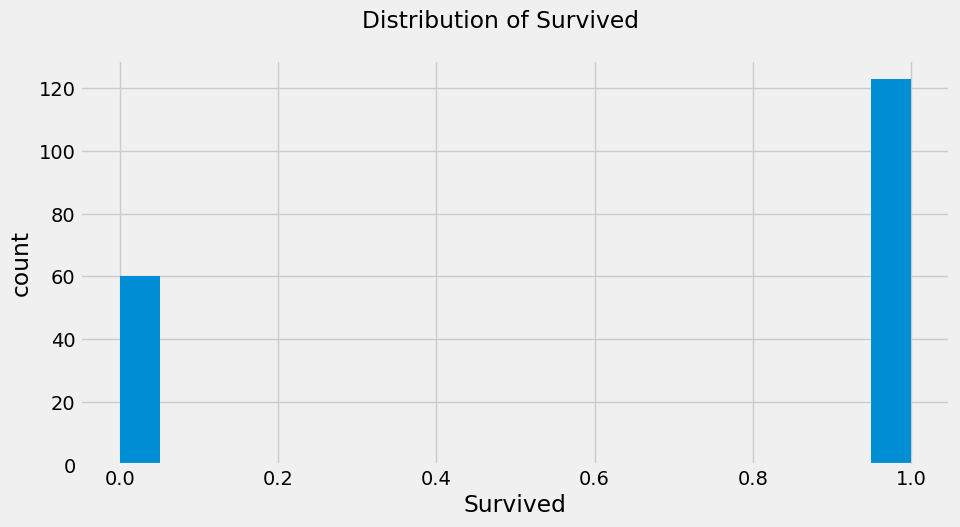

In [ ]:
plt.figure(figsize = (10, 5))

df['Survived'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()

Мы видим, что значения распределены не совсем ровно, но критичного перекоса тоже нет. Если значения целевой переменной несбалансированы (тогда говорят, что датасет несбалансирован), то нужны специальные методы для борьбы с дисбалансом.

### Шаг 2. Анализ признаков

При исследовании и сборе данных очень важно знать, какого рода данные вы получаете, чтобы их можно было хорошо интерпретировать и анализировать. Чаще всего в исследованиях используются два типа данных:
* Категориальные данные
* Количественные (Числовые) данные


**Категориальные данные** — это данные с ограниченным числом уникальных значений или категорий. Примеры таких типов данных — пол, семейное положение, уровень образования и т.п. Категориальные поля могут быть текстовыми или числовыми, в которых категории закодированы числовыми кодами (например, 0 = Женский, а 1 = Мужской). Также иногда эти данные называются качественными данными.

Существуют следующие виды категориальных данных:

* Набор. Поле/переменная, значения которого представляют категории без естественного упорядочивания (например, подразделение компании, в котором работает сотрудник). Примеры таких переменных — регион, почтовый индекс или религия. Также иногда такой тип называют номинальной переменной.
* Упорядоченный набор. Это поле/переменная, на значениях которых есть естественный порядок. Это могут быть, например, уровни удовлетворенности обслуживанием (от крайней неудовлетворенности до полной удовлетворенности), уровень образования (от базового школьного до доктора наук). Также такой тип переменной называют порядковой переменной.
* Флаг. Поле или переменная с двумя отдельными значениями. Например, Да и Нет, 1 и 2. Также известны также как дихотомические или двоичные переменные.

**Количественные (числовые) данные** — это данные, для элементов которых определены порядок значений и расстояния между значениями. Пример признака такого типа — зарплата. Зарплата 7195 рублей больше зарплаты 5398 рублей, а разница между этими зарплатами - 1797 рублей. Такие данные также называют непрерывными или числовым диапазоном.


#### Категориальные признаки

Почти любая модель машинного обучения умеет работать только с числами, поэтому нам необходимо перевести категориальные признаки, представленные не числами, в числа. Есть несколько способов как это можно сделать. На этом семинаре мы рассмотрим два основных метода кодирования категориальных признаков: One-hot encoding и Label Encoding.

Для более подробного ознакомления можно почитать этот [блог-пост](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f)

Выведем, какие колонки у нас есть:

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

Заведем список категориальных колонок:

In [ ]:
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Title']

In [ ]:
categorical_features = df[categorical_columns]

In [ ]:
categorical_features.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title'], dtype='object')

In [ ]:
categorical_features

,Pclass,Sex,SibSp,Parch,Embarked,Title
PassengerId,,,,,,
2,1,female,1,0,C,Mrs
4,1,female,1,0,S,Mrs
7,1,male,0,0,S,Mr
11,3,female,1,1,S,Miss
12,1,female,0,0,S,Miss
...,...,...,...,...,...,...
872,1,female,1,1,S,Mrs
873,1,male,0,0,S,Mr
880,1,female,0,1,C,Mrs


Найдем среди категориальных колонок те, значения в которых не числовые:

In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [ ]:
unprocessed_cat_features

['Sex', 'Embarked', 'Title']

**One-hot-encoding**

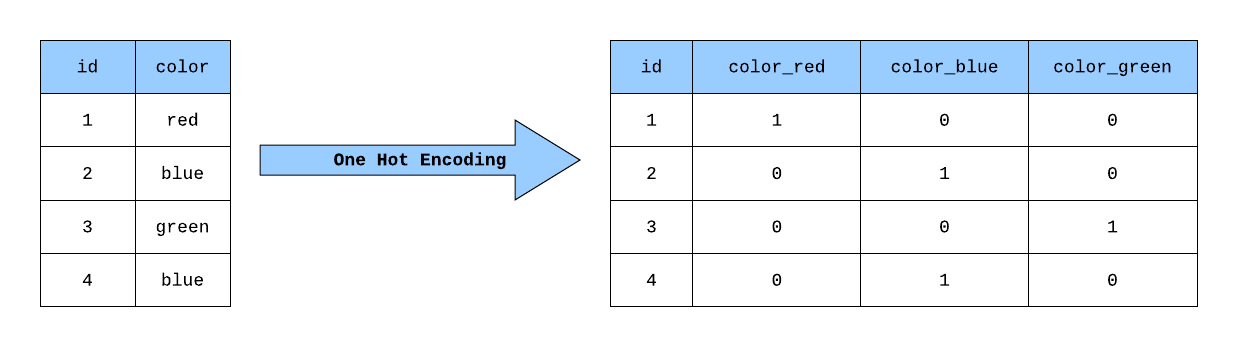

One Hot Encoding - наиболее распространенный метод кодирования категориальных переменных. Вот как он работает:

Пусть категориальная переменная имеет $n$ уникальных значений — $A_1$, $A_1$, $\dots$, $A_n$. Для каждого уникального значения $A_i$ создается новый столбец-признак. В каждом из этих столбцов значения всех элементов будут 0 или 1 (т.е. столбцы бинарные). В столбце, соответствующем значению $A_1$, единицы будут стоять в тех строках, в которых изначально у категориальной переменной было значение $A_1$

Например, если признак имеет три уникальных значения 'A', 'B' и 'C', то на его основе будет создано три столбца, и элемент со значением признака 'B' превратится в набор значений вида [0,1,0] в трех новых столбцах. Пример применения one-hot encoding также показан на картинке выше.

In [ ]:
unprocessed_cat_features

['Sex', 'Embarked', 'Title']

In [ ]:
df[unprocessed_cat_features]

,Sex,Embarked,Title
PassengerId,,,
2,female,C,Mrs
4,female,S,Mrs
7,male,S,Mr
11,female,S,Miss
12,female,S,Miss
...,...,...,...
872,female,S,Mrs
873,male,S,Mr
880,female,C,Mrs


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index
                          )

In [ ]:
one_hot_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,,,,,,,,,,
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
872,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
873,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
880,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,,,,,,,,,,,,,,,,
2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0,1,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,1,3,4.0,1,1,16.7000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12,1,1,58.0,0,0,26.5500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,47.0,1,1,52.5542,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
873,0,1,33.0,0,0,5.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
880,1,1,56.0,0,1,83.1583,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# perform one-hot encoding on the 'color' column
one_hot = pd.get_dummies(df['Title'])

# concatenate the one-hot encoding with the original dataframe
df_one_hot = pd.concat([df, one_hot], axis=1)

# drop the original 'color' column
df_one_hot = df_one_hot.drop('Title', axis=1)

In [ ]:
df_one_hot

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare
PassengerId,,,,,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,False,False,False,True,False
4,1,1,female,35.0,1,0,53.1000,S,False,False,False,True,False
7,0,1,male,54.0,0,0,51.8625,S,False,False,True,False,False
11,1,3,female,4.0,1,1,16.7000,S,False,True,False,False,False
12,1,1,female,58.0,0,0,26.5500,S,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,female,47.0,1,1,52.5542,S,False,False,False,True,False
873,0,1,male,33.0,0,0,5.0000,S,False,False,True,False,False
880,1,1,female,56.0,0,1,83.1583,C,False,False,False,True,False


**Label Encoding**

В этом случае каждому уникальному значению столбца присваивается уникальное целочисленное значение.

Это более простой метод кодирования, но он имеет недостаток. Дето в том, что, переводя категориальные признаки в числа, мы задаем на элементах подядок. Например, если у нас есть признак "регион проживания", в котором значения "Москва", "Воронеж" и "Саратов", то после Label Encoding у нас получатся значения 0, 1 и 2. 2 > 1 > 0, но для изначальных значений признаков ("Москва", "Воронеж" и "Саратов") подобного отношения не существует. Некоторые модели машинного обучения могут пользоваться тем, что на элементах задан порядок, и тогда они будут неверно обрабатывать наши категориальные переменные.

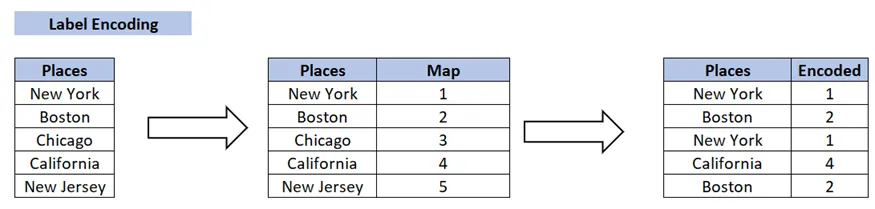

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  df[column] = label_encoding.fit_transform(df[column])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,0,3
4,1,1,0,35.0,1,0,53.1000,2,3
7,0,1,1,54.0,0,0,51.8625,2,2
11,1,3,0,4.0,1,1,16.7000,2,1
12,1,1,0,58.0,0,0,26.5500,2,1


#### Количественные признаки

Выделим числовые признаки нашего датасета:

In [ ]:
numerical_columns = ['Age', 'Fare']

In [ ]:
num_features = df[numerical_columns]

print("Количество количественных признаков: ", len(num_features.columns))

Количество количественных признаков:  2


In [ ]:
num_features

,Age,Fare
PassengerId,,
2,38.0,71.2833
4,35.0,53.1000
7,54.0,51.8625
11,4.0,16.7000
12,58.0,26.5500
...,...,...
872,47.0,52.5542
873,33.0,5.0000
880,56.0,83.1583


Посмотрим на распределения этих числовых признаков:

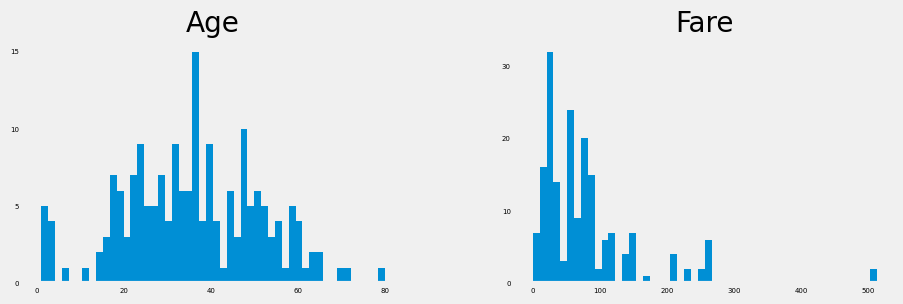

In [ ]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

И еще построим все возможные графики взаимных распределений всех признаков между собой:

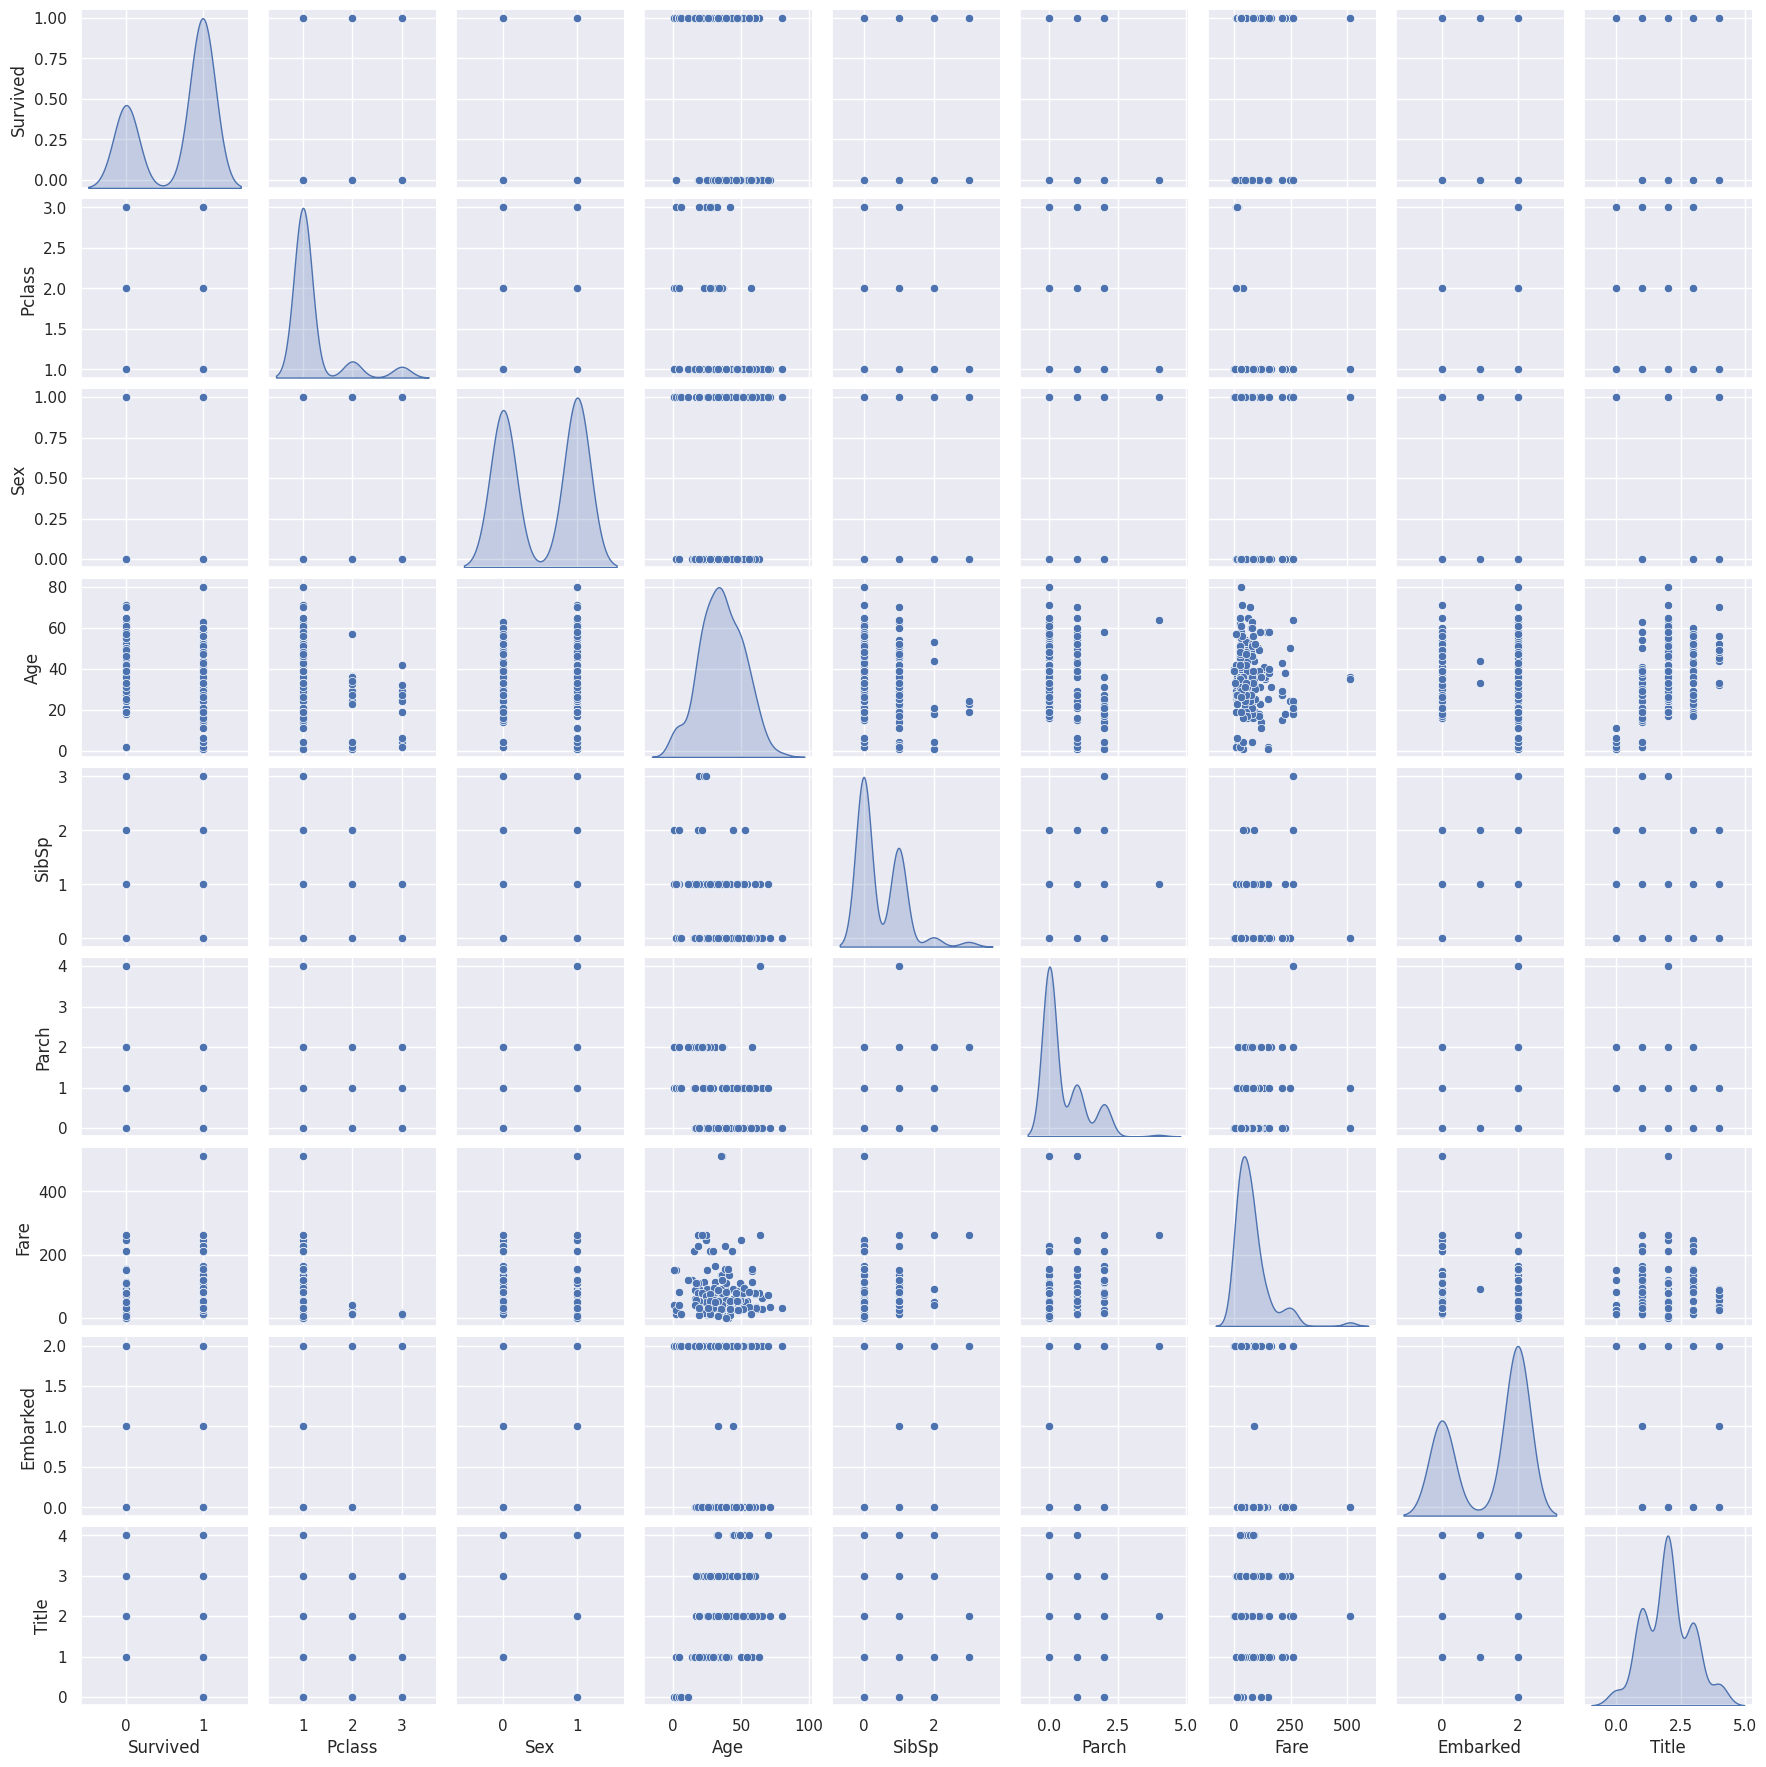

In [ ]:
sns.set()
sns.pairplot(df, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

Также давайте построим матрицу корреляций наших признаков.

Корреляция — мера линейной зависимости признаков друг от друга. Сильно скоррелированные признаки могут иметь негативный эффект на обучение линейных моделей. Если в датасете есть сильно скоррелированные признаки, и вы хотите использовать линейную модель машинного обучения, то от таких признаков нужно избавляться. Делать это можно несколькими способами:

1. Оставляя один из признаков
2. Соединив признак в один и создав новый признак
3. Сделать нелинейное преобразование признаков

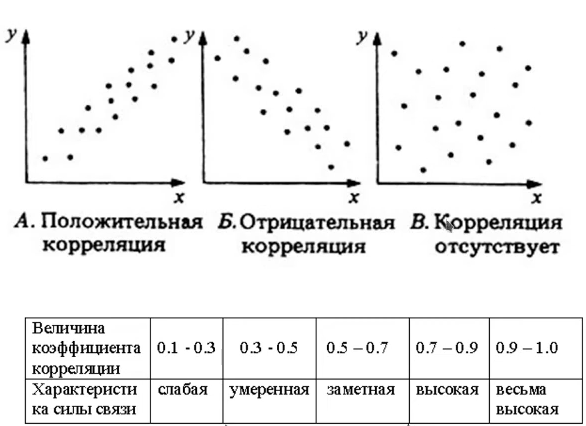

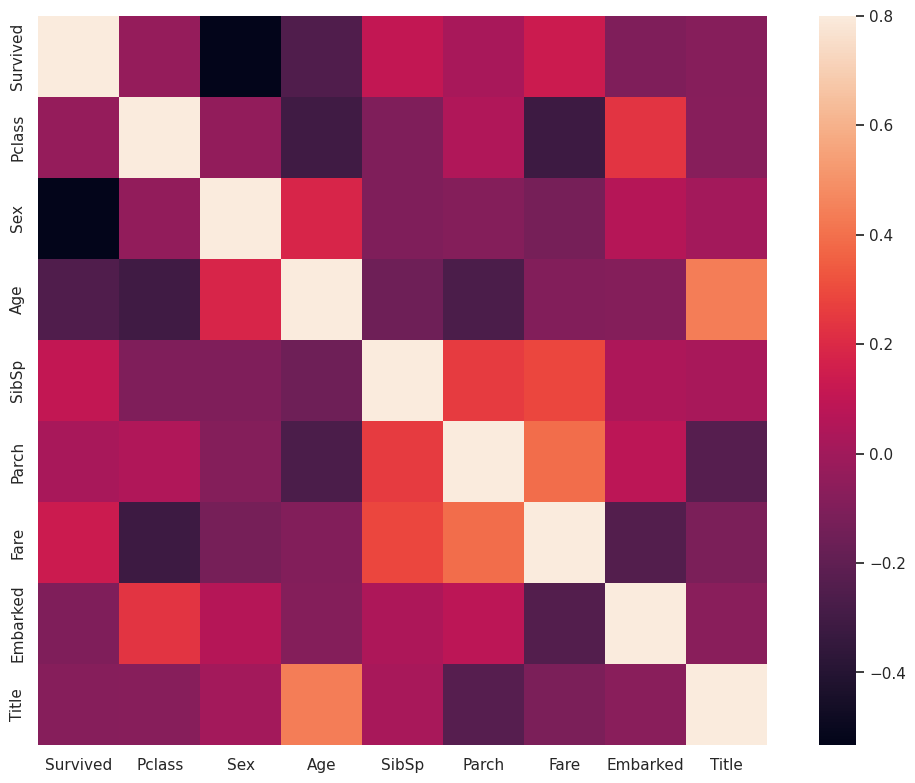

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Сделаем картинку чуть понятнее и красивее:

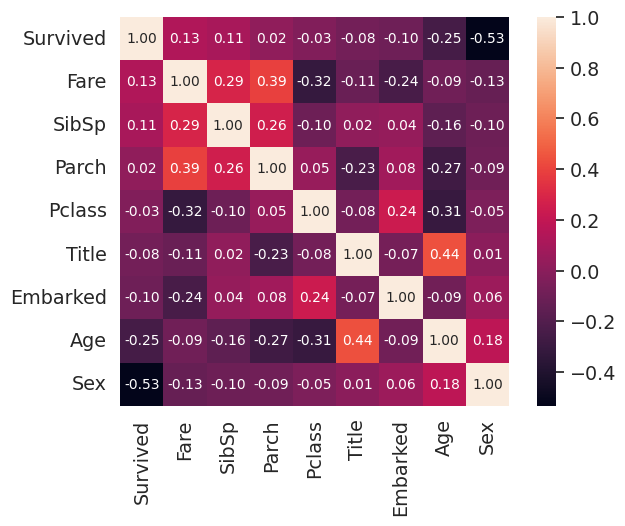

In [ ]:
# correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Получается, когда мы смотрим на матрицу корреляций, нам важно следующее:
1. Хорошо, если целевая переменная и признак коррелируют. Значит, есть понятная зависимость между ответом и признаком;
2. Плохо, если признаки коррелируют между собой.


### Шаг 3. Анализ влияния признаков на целевую переменную

Давайте теперь попробуем проанализировать наши данные в зависимости от нашей целевой переменной. Напомню, что в нашей задаче мы хотим предсказывать, выжил или не выжил человек на Титанике.

Попробуем ответить на следующие вопросы:
- Какие люди выживали чаще всего?
- Влияли ли пол и возраст на степень выживаемости на Титанике?
- Влияло ли наличие семьи на степень выживаемости?
- Есть ли зависимость стоимости билета от класса обслуживания?


Итак, какие люди выживали чаще всего?

Давайте нарисуем круговую диаграмму выживших в зависимости от класса обслуживания.

In [ ]:
df['Survived'].value_counts()

,count
Survived,
1,123
0,60


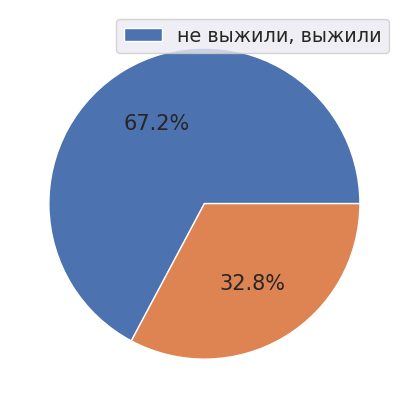

In [ ]:
# Готовим данные для графика
data = df['Survived'].value_counts()

# Строим круговую диаграмму
plt.pie(data, autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()

In [ ]:
df[df['Pclass'] == 1]['Survived'].value_counts()

,count
Survived,
1,106
0,52


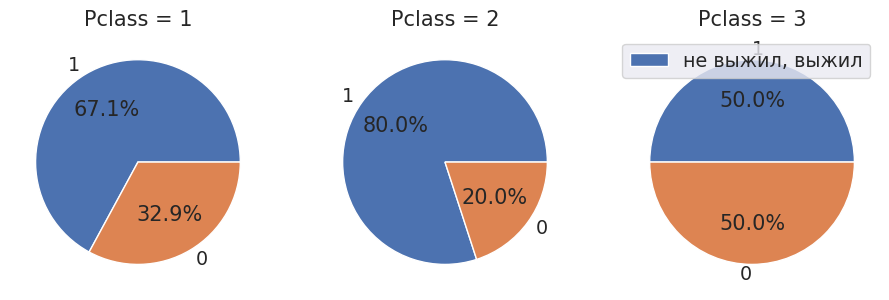

In [ ]:
# Готовим данные для графика
data1 = df[df['Pclass'] == 1]['Survived'].value_counts()
data2 = df[df['Pclass'] == 2]['Survived'].value_counts()
data3 = df[df['Pclass'] == 3]['Survived'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')

ax1.set_title("Pclass = 1")
ax2.set_title("Pclass = 2")
ax3.set_title("Pclass = 3")

plt.legend(['не выжил, выжил'])

plt.show()

Можно заметить, что люди с самым низким классом обслуживания в большей степени не выжили.

Посмотрим теперь, влияли ли пол и возраст на степень выживаемости или нет:

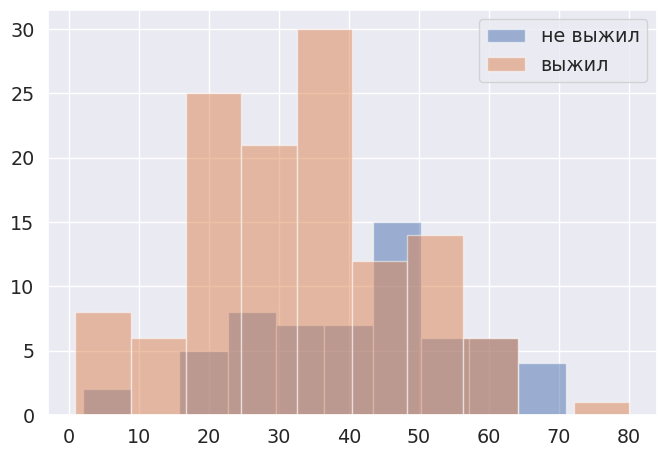

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(df['Age'][df['Survived'] == 0], alpha=0.5, label='не выжил')
plt.hist(df['Age'][df['Survived'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

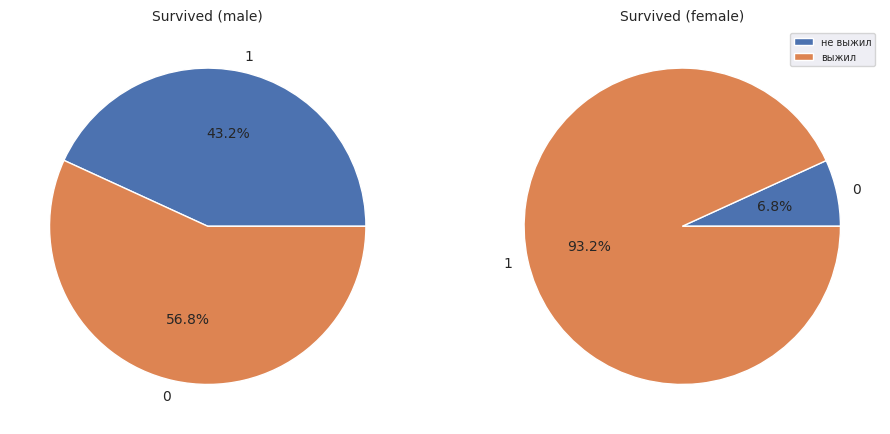

In [ ]:
# female - 0, male - 1
data_1 = df[df['Sex']== 1]['Survived'].value_counts().sort_values()
data_2 = df[df['Sex']== 0]['Survived'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Можно заметить, что среди женщин процент выживших был гораздо больше.

Можно также отрисовать распределения признака возраста при помощи библиотеки seaborn.

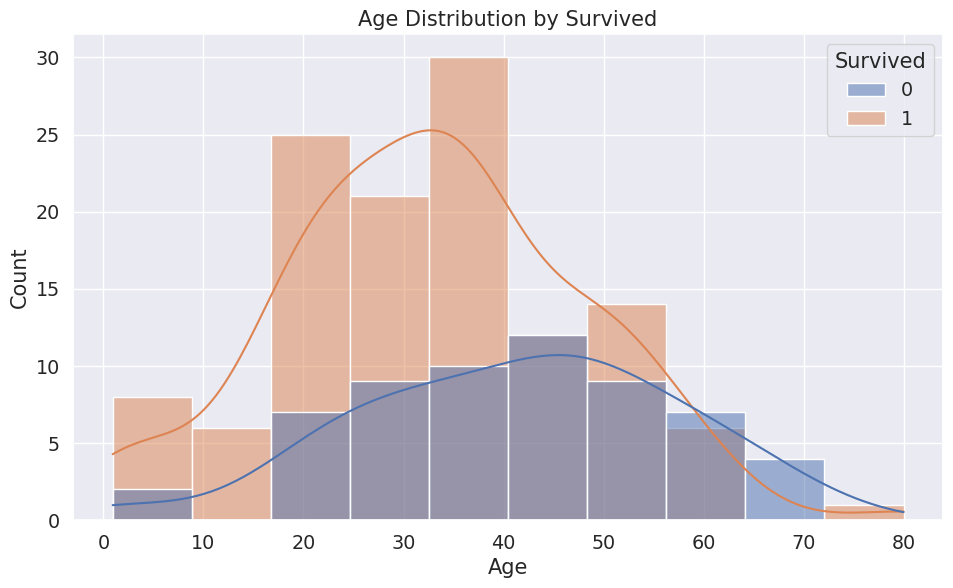

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, hue='Survived')
plt.title('Age Distribution by Survived')
plt.show()

Давайте теперь проверим, есть ли влияние стоимости билета на выживаемость:

In [ ]:
# Готовим данные для графика
data1 = df['Fare'][df['Survived'] == 0]
data2 = df['Fare'][df['Survived'] == 1]
data1.head()

,Fare
PassengerId,
7,51.8625
28,263.0000
55,61.9792
63,83.4750
76,7.6500


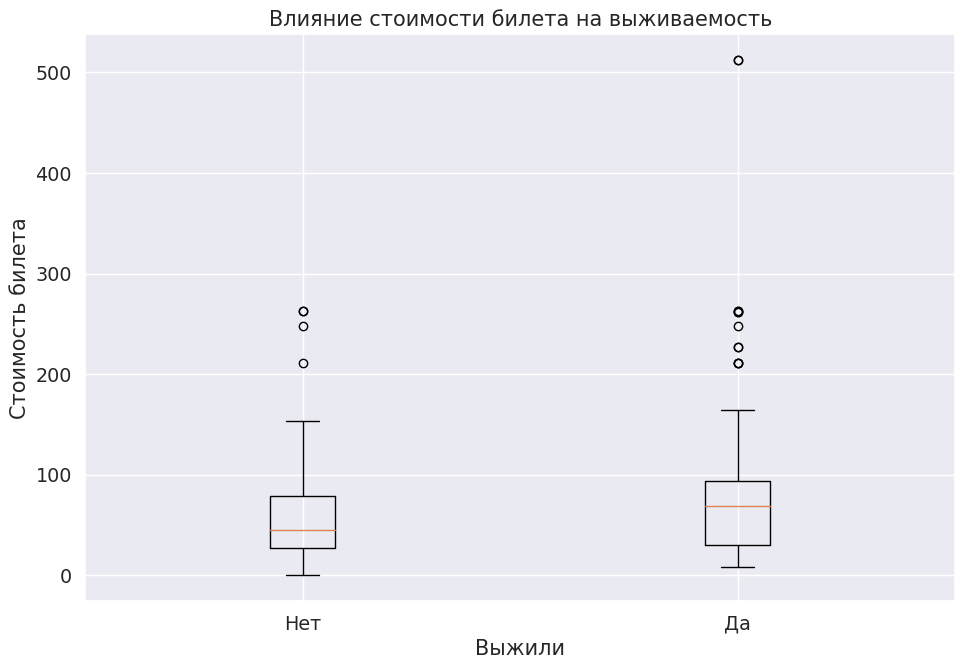

In [ ]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Влияние стоимости билета на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('Стоимость билета')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

Давайте поподробнее поймем, что это же такое боксплот.

Давайте сначала познакомимся с таким понятием как **квантиль распределения**. Квантили это такие значения признака, которые делят упорядоченные данные на некоторое число равных частей. К примеру, медиана делит наши данные на две равные части. Однако в статистике также часто используются квартили распределения. **Квартили распределения** это три точки, которые делят наши данные на 4 равные части.



        Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                      |-----:-----|
      o      |--------|     :     |--------|    o  o
                      |-----:-----|
    flier             <----------->            fliers
                          IQR

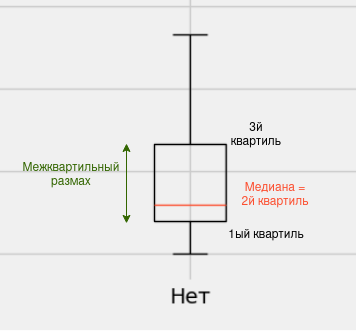

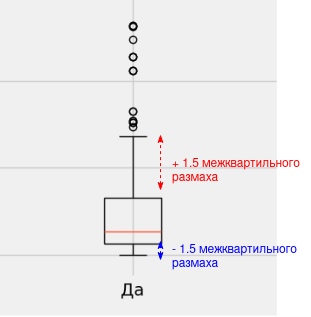

In [ ]:
first_quartile = np.quantile(df['Fare'].values, q=0.25)
third_quartile = np.quantile(df['Fare'].values, q=0.75)
print(f'1ый квартиль = {first_quartile}')
print(f'3ий квартиль = {third_quartile}')

1ый квартиль = 29.7
3ий квартиль = 90.0


Чем больше межквартильный размах, тем больше велика вариативность нашего признака.

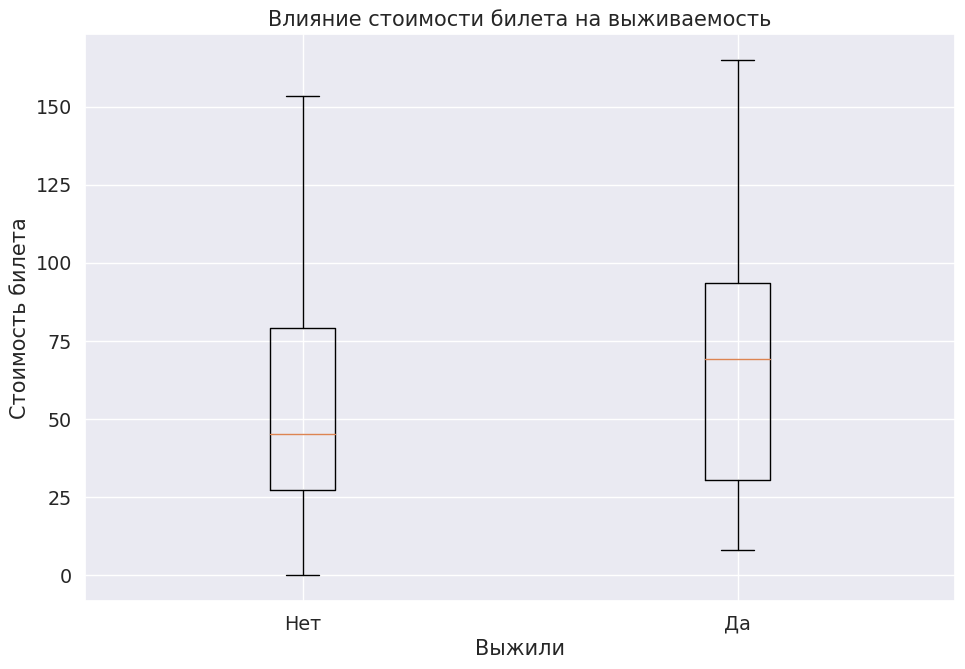

In [ ]:
# Строим боксплот без выбросов

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Влияние стоимости билета на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('Стоимость билета')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

## Подготовка данных для обучения модели

### Разделение на train/test

Разделять выборку на обучающую и тестирующую части мы будем при помощи библиотеки sklearn.

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,0,3
4,1,1,0,35.0,1,0,53.1000,2,3
7,0,1,1,54.0,0,0,51.8625,2,2


In [ ]:
X = df.drop(columns=['Survived']).values
y = df['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

(!) Важно: когда вы делите на train\test в функции `train_test_split()` есть параметр `shuffle`, который перемешивает данные.

Перемешивание данных - это простая, но мощная техника, позволяющая обеспечить эффективное обучение и оценку моделей машинного обучения. Случайная перестановка точек данных позволяет избежать смещений, улучшить обобщение и сделать модели более надежными.

### Масштабирование данных

Зачем нам нужно масштабировать данные?

Приводить данные к одной шкале важно, когда мы сравниваем измерения в разных единицах. Переменные, измеренные в разных масштабах, не вносят одинакового вклада в анализ и в итоге могут создать байес.

Например, переменная, находящаяся в диапазоне от 0 до 1000, будет превосходить переменную, находящуюся в диапазоне от 0 до 1. Использование этих переменных без стандартизации даст переменной с большим диапазоном вес 1000 в анализе. Преобразование данных в сопоставимые шкалы может предотвратить эту проблему. Типичные процедуры стандартизации данных выравнивают диапазон и/или изменчивость данных.

Как мы говорили в лекции часто необходимо привести все признаки к одному масштабу. Для этого существует библиотека sklearn, которая предоставляет методы рескейлинга данных. На этом семинаре мы рассмотрим два основных: `StandardScaler()` и `MinMaxScaler()`. У каждого скейлера есть два метода: `.fit()` и `.transform()`.

`StandardScaler()` во время `.fit()` для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время `.transform()` к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


`MinMaxScaler()` во время `.fit()` для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время `.transform()` к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

(!)Важно, чтобы статистика данных считалась только на обучающей выборке, т.е. на `X_train`, так как иначе, если мы будем считать статистику на всем датасете, модель будет уже иметь какую то информацию о тестовой выборке и предсказания будут нечестными, так как по сути вы ей дали подсказку.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [ 1.17123288  0.5        35.66041096  0.42465753  0.47260274 78.04138151
  1.26027397  1.97260274]
После масштабирования:  [-4.18234701e-17  0.00000000e+00  3.04170692e-18  1.57408333e-16
  3.95421899e-17  1.49804066e-16  1.18626570e-16  1.15584863e-16]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [ 1.17123288  0.5        35.66041096  0.42465753  0.47260274 78.04138151
  1.26027397  1.97260274]
После масштабирования:  [0.08561644 0.5        0.43930717 0.14155251 0.23630137 0.15232663
 0.63013699 0.49315068]


## Заключение



На данном семинаре мы с вами познакомились с библиотеками Pandas и Matplotlib.

Давайте еще раз вспомним основные шаги анализа и обработки данных:
1. Очистка данных
2. Создание новых признаков
3. Удаление неинформативных столбцов
4. Анализ целевой переменной и признаков
5. Анализ влияния признаков на целевую переменную
6. Подготовка данных к обучению и валидации.

Теперь вы можете сами подготавливать любые датасеты под свои задачи.

Все ссылочки в одном месте!

* Студенты с прошлых потоков сделали замечательную [инструкцию](https://disk.yandex.ru/i/sqqI2xVBcztIDw) по использованию Google Colab, где вы можно узнать, как можно загрузить данные на Google Disk.
* Очень классный плейлист на ютубе про работу с pandas [What is a Pandas?](https://youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&si=6faVt2CiaaA73QAQ).

* Для базового ознакомления с Matplotlib можно почитать официальный туториал [Matplotlib Quick Start](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).
* Классная лекция про визуальный анализ данных $→$ [тык на ссылку](https://www.youtube.com/watch?v=uJpDzHGUamg&ab_channel=machinelearrrning).
* Классный сайт для подбора цветов: [In Color Balance](https://color.romanuke.com/)
* Курс по [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) от Kaggle
* Разные методы кодирования категориальных признаков [блог-пост](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f)